Importing Modules

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Setting seaborn figure parameters 

In [66]:
sns.set(rc={'figure.figsize':(12,6)})
sns.set(font='Times New Roman', font_scale=1.2)

Transforming the data 

In [67]:
fatalities = pd.read_csv('fatalities.csv')
fatalities.drop_duplicates(inplace=True)
fatalities['date_of_event'] = pd.to_datetime(fatalities['date_of_event'])
fatalities['date_of_death'] = pd.to_datetime(fatalities['date_of_death'])
fatalities.loc[fatalities['name'] == "Name unknown to B'Tselem", 'name'] = 'Unknown'
fatalities['age'].fillna(fatalities['age'].mean(), inplace=True)
fatalities['gender'].fillna('Unknown',inplace=True)
fatalities['place_of_residence'].fillna('Unkown',inplace=True)
fatalities['place_of_residence_district'].fillna('Unkown',inplace=True)
fatalities['type_of_injury'].fillna('Unkown',inplace=True)
fatalities['ammunition'].fillna('Unkown',inplace=True)
fatalities['killed_by'].fillna('Unkown',inplace=True)

Trend of Fatalities over Time

C:\Users\Noman\AppData\Local\Temp\ipykernel_8404\1201765128.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=fatalities_over_time.index, y=fatalities_over_time.values, palette='husl', marker='o', linestyle='dashed')


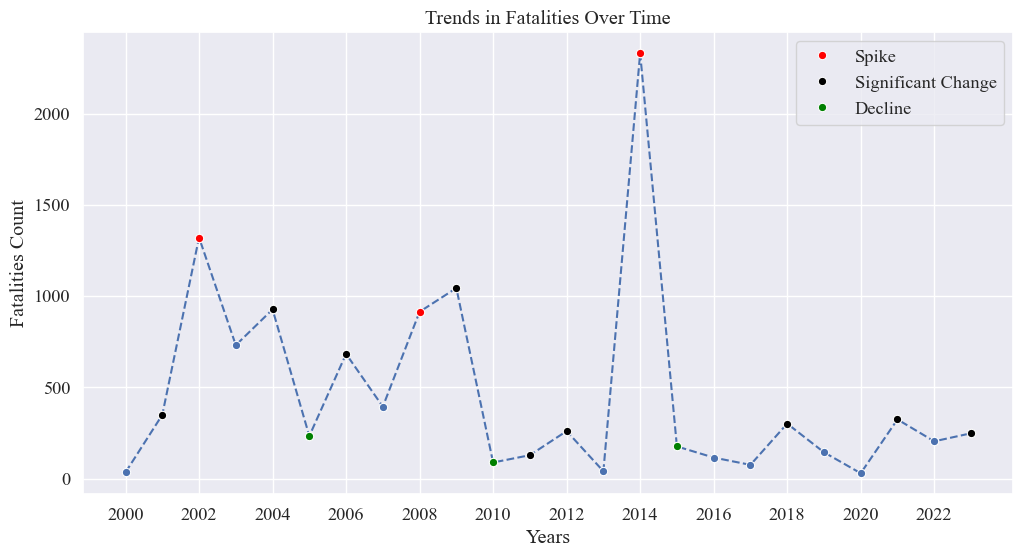

In [68]:
fatalities_over_time = fatalities.groupby(fatalities['date_of_event'].dt.year).size()

slope_diff = fatalities_over_time.diff()
#Determine spike, significant change, and decline
spike = slope_diff > slope_diff.quantile(0.9)
significant_change = (slope_diff >= slope_diff.quantile(0.5)) & (slope_diff <= slope_diff.quantile(0.9))
decline = slope_diff < slope_diff.quantile(0.1)

#Draw line
sns.lineplot(x=fatalities_over_time.index, y=fatalities_over_time.values, palette='husl', marker='o', linestyle='dashed')

#Show changes in the slope of fatalities in data 
sns.lineplot(x=fatalities_over_time.index[spike], y=fatalities_over_time.values[spike], marker='o', linestyle='', color='red', label='Spike')
sns.lineplot(x=fatalities_over_time.index[significant_change], y=fatalities_over_time.values[significant_change], marker='o', linestyle='', color='black', label='Significant Change')
sns.lineplot(x=fatalities_over_time.index[decline], y=fatalities_over_time.values[decline], marker='o', linestyle='', color='green', label='Decline')

#Years difference to show on the graph
plt.xticks(range(min(fatalities_over_time.index), max(fatalities_over_time.index) + 1, 2))

#Set figures paramters
plt.title('Trends in Fatalities Over Time')
plt.xlabel('Years')
plt.ylabel('Fatalities Count')
plt.legend()

plt.show()

"The graph indicates spikes, declines, and significant changes in fatalities over time. It is evident that the major spike occurred in 2014, while the decline was observed in 2010.

Examining the age, gender, and citizenship of the individuals killed

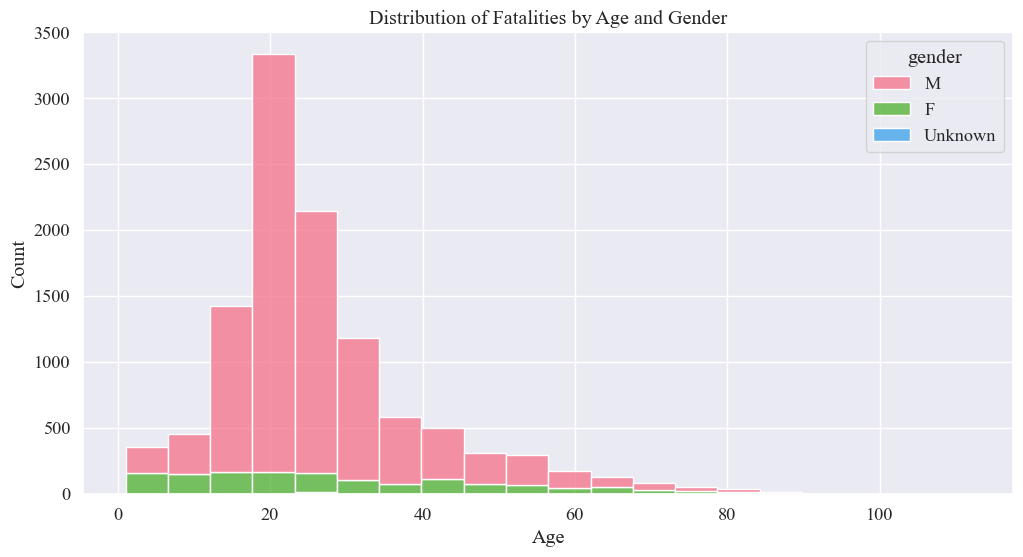

In [69]:
sns.histplot(data=fatalities, x='age', palette='husl', hue='gender', multiple='stack', bins=20)
plt.title('Distribution of Fatalities by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

The fact that the average age of fatalities is 22 and males represent the most affected gender highlights a concerning trend.

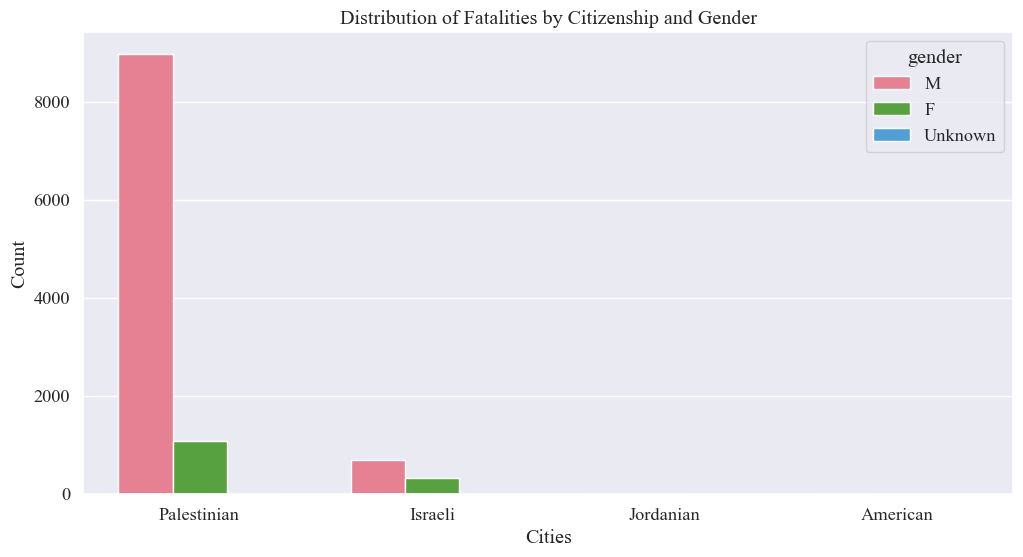

In [70]:
sns.countplot(data=fatalities, x='citizenship', palette='husl', hue='gender',width=0.70)
plt.title('Distribution of Fatalities by Citizenship and Gender')
plt.xlabel('Cities')
plt.ylabel('Count')

plt.show()

Based on the graph, it appears that the majority of individuals affected are Palestinian citizens, predominantly male. Additionally, there's a discernible trend indicating that Israeli targets primarily consist of males from the Palestinian population. This observation suggests a specific focus on males within the Palestinian demographic, raising questions about the nature and implications of this targeting. Understanding these trends sheds light on the disproportionate impact on Palestinian males, prompting a closer examination of the dynamics and potential reasons behind such targeting strategies.

Text(0, 0.5, 'Count')

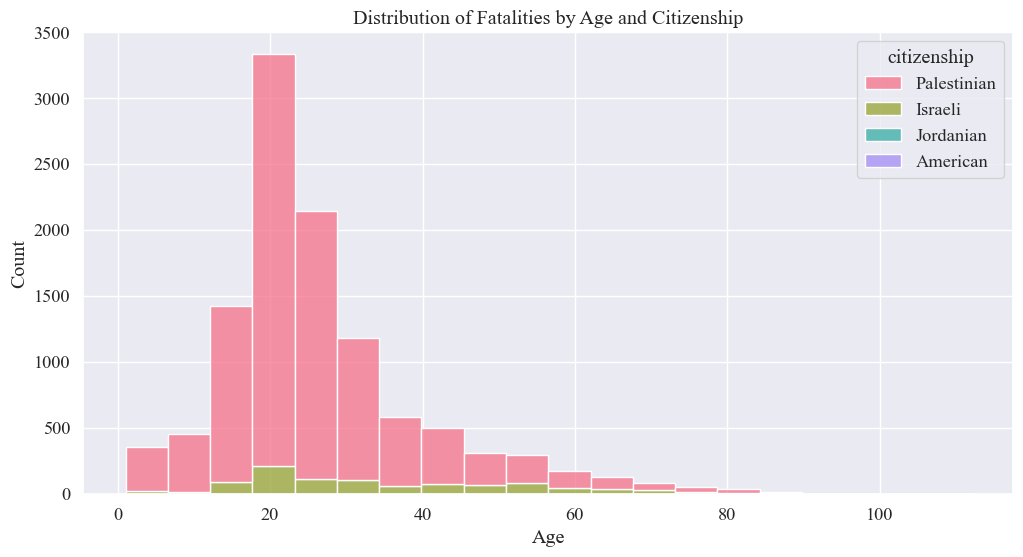

In [71]:
sns.histplot(data=fatalities, x='age', hue='citizenship', multiple='stack', palette='husl', bins=20)
plt.title('Distribution of Fatalities by Age and Citizenship')
plt.xlabel('Age')
plt.ylabel('Count')


C:\Users\Noman\AppData\Local\Temp\ipykernel_8404\394392325.py:5: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.relplot(


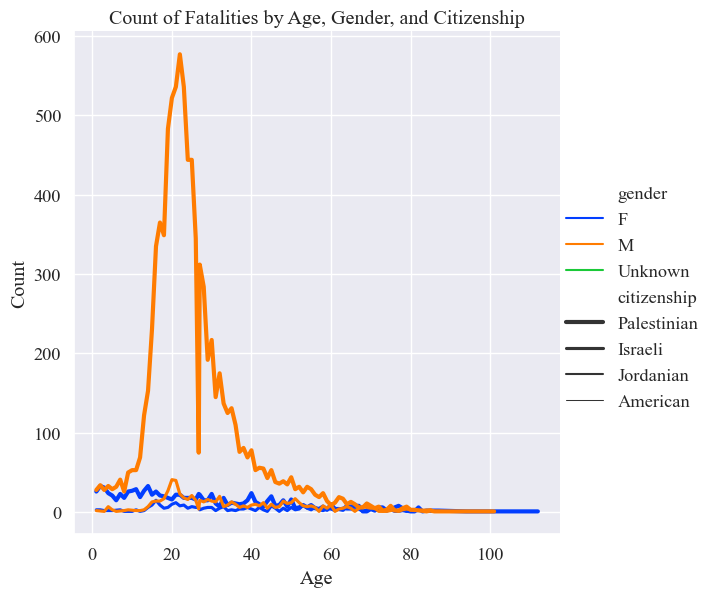

In [72]:
palette = sns.color_palette("bright")

fatalities_count = fatalities.groupby(['age', 'gender', 'citizenship']).size().reset_index(name='count')

sns.relplot(
    data=fatalities_count,
    x="age", y="count",
    hue="gender", size="citizenship",
    kind="line", size_order=["Palestinian", "Israeli", "Jordanian", "American"], palette=palette,
    height=6, aspect=1, facet_kws=dict(sharex=False),
)

plt.title('Count of Fatalities by Age, Gender, and Citizenship')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

Distribution of fatalities by their place of residence.

C:\Users\Noman\AppData\Local\Temp\ipykernel_8404\745942326.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=combined_data.index, y=combined_data.values, palette='hls',width=0.60)


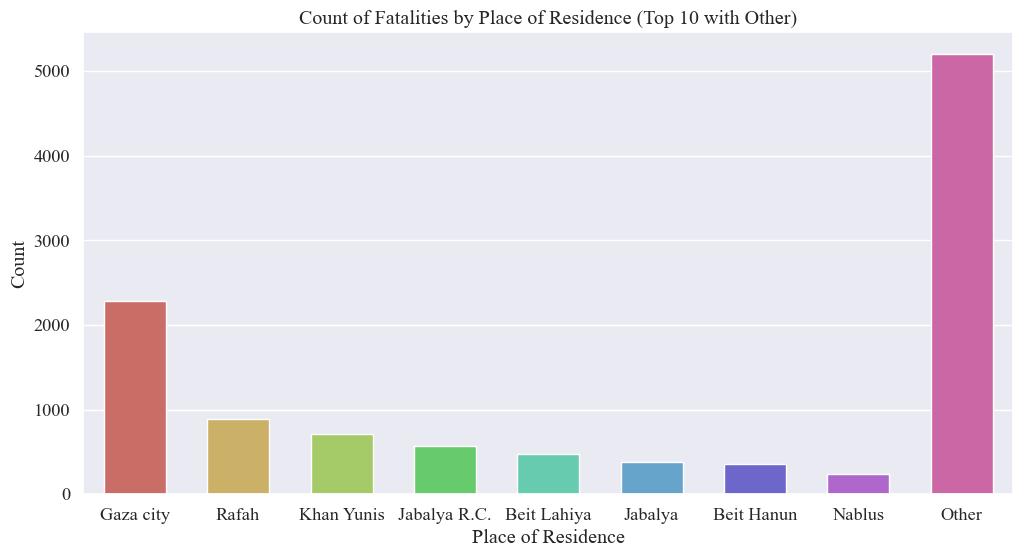

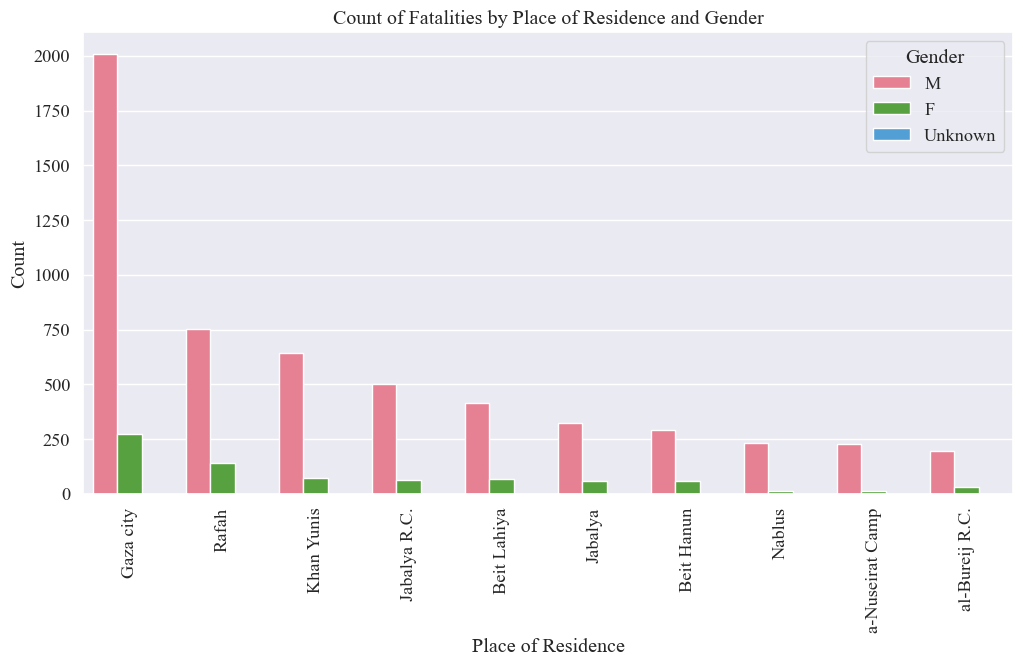

In [73]:
place_of_residence = fatalities['place_of_residence'].value_counts()

top_10 = place_of_residence.head(8)
sum_other = place_of_residence.iloc[8:].sum()
combined_data = pd.concat([top_10, pd.Series({'Other': sum_other})])

sns.barplot(x=combined_data.index, y=combined_data.values, palette='hls',width=0.60)

plt.title('Count of Fatalities by Place of Residence (Top 10 with Other)')
plt.xlabel('Place of Residence')
plt.ylabel('Count')
plt.show()

sns.countplot(data=fatalities, x='place_of_residence', hue='gender'
              , order=fatalities['place_of_residence'].value_counts().head(10).index
              ,palette='husl')
plt.xticks(rotation=90)
plt.title('Count of Fatalities by Place of Residence and Gender')
plt.xlabel('Place of Residence')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

The majority of fatalities stem from Gaza City, the capital of Palestine, followed by the second-highest fatality rate observed in Rafah. The data indicates escalated violence primarily concentrated in Gaza City, highlighting it as a focal point of heightened conflict or incidents leading to fatalities.

Examine the types of injuries inflicted on individuals.

C:\Users\Noman\AppData\Local\Temp\ipykernel_8404\1087807678.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=combined_data.index, y=combined_data.values, palette='husl',width=0.40)


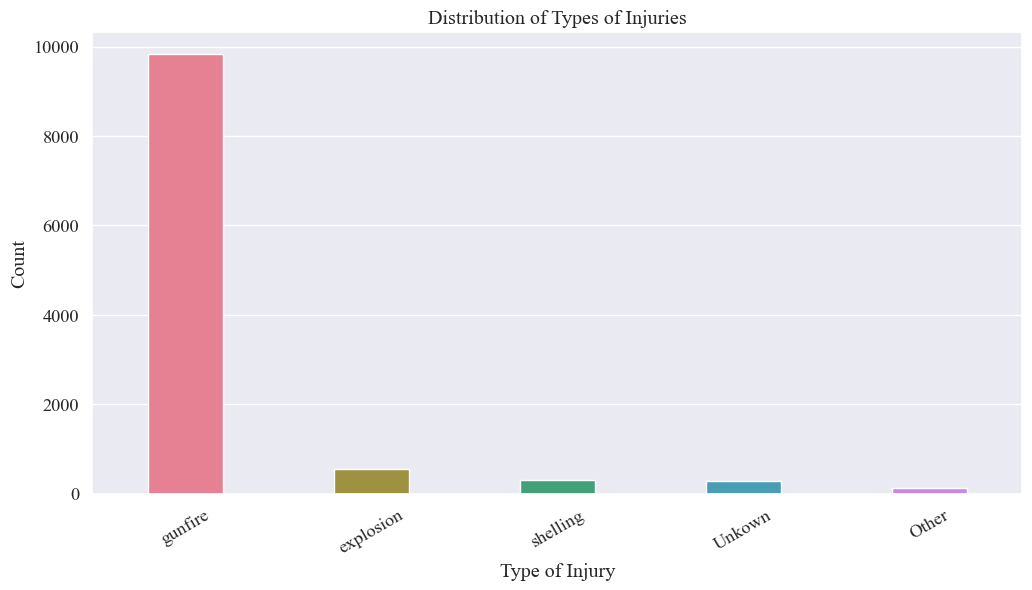

In [74]:
injuries = fatalities['type_of_injury'].value_counts()
top_10 = injuries.head(4)
sum_other = injuries.iloc[4:].sum()
combined_data = pd.concat([top_10, pd.Series({'Other': sum_other})])

sns.barplot(x=combined_data.index, y=combined_data.values, palette='husl',width=0.40)

plt.title('Distribution of Types of Injuries')
plt.ylabel('Count')
plt.xlabel('Type of Injury')
plt.xticks(rotation=30)
plt.show()


The graph clearly depicts that gunfire is the most prevalent cause of injury, resulting in the highest number of fatalities. Moreover, the severity of injuries caused by gunfire surpasses that of all other injury types. This data strongly suggests that individuals were predominantly targeted and affected by gunfire, signifying its disproportionate impact compared to other forms of injury.

Analyze the ammunition and means by which the individuals were killed.

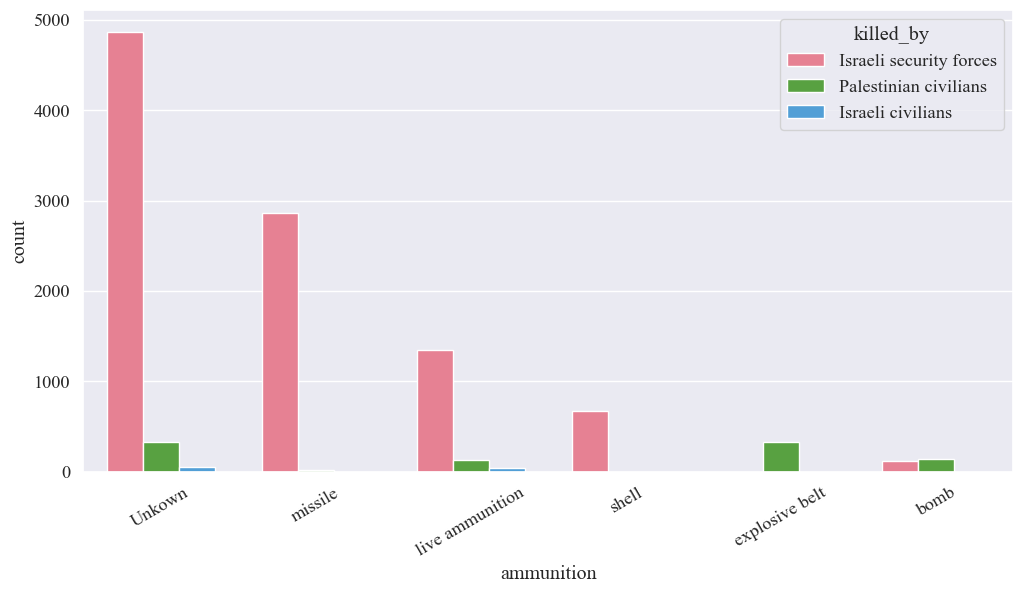

In [75]:
sns.countplot(data=fatalities,x='ammunition',hue='killed_by',palette='husl',width=0.70,order=fatalities['ammunition'].value_counts().head(6).index)
plt.xticks(rotation=30)
plt.show()

The data indicates that the predominant ammunition type used in these incidents is categorized as "unknown," with the majority of fatalities attributed to actions by the Israeli security forces. The second-highest recorded ammunition type is missiles, exclusively launched by Israel, suggesting a significant impact from Israeli actions. Live ammunition features prominently and is primarily associated with the Israeli security forces, while a smaller fraction is linked to Palestinian civilians. Bombs seem to be utilized relatively evenly in comparison. This information underscores the disproportionate use of force by Israeli security forces and sheds light on the types of ammunition predominantly associated with these incidents.

Create profiles of the victims based on the available data such as age, gender, citizenship,
and place of residence.

C:\Users\Noman\AppData\Local\Temp\ipykernel_8404\3581216952.py:8: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.relplot(


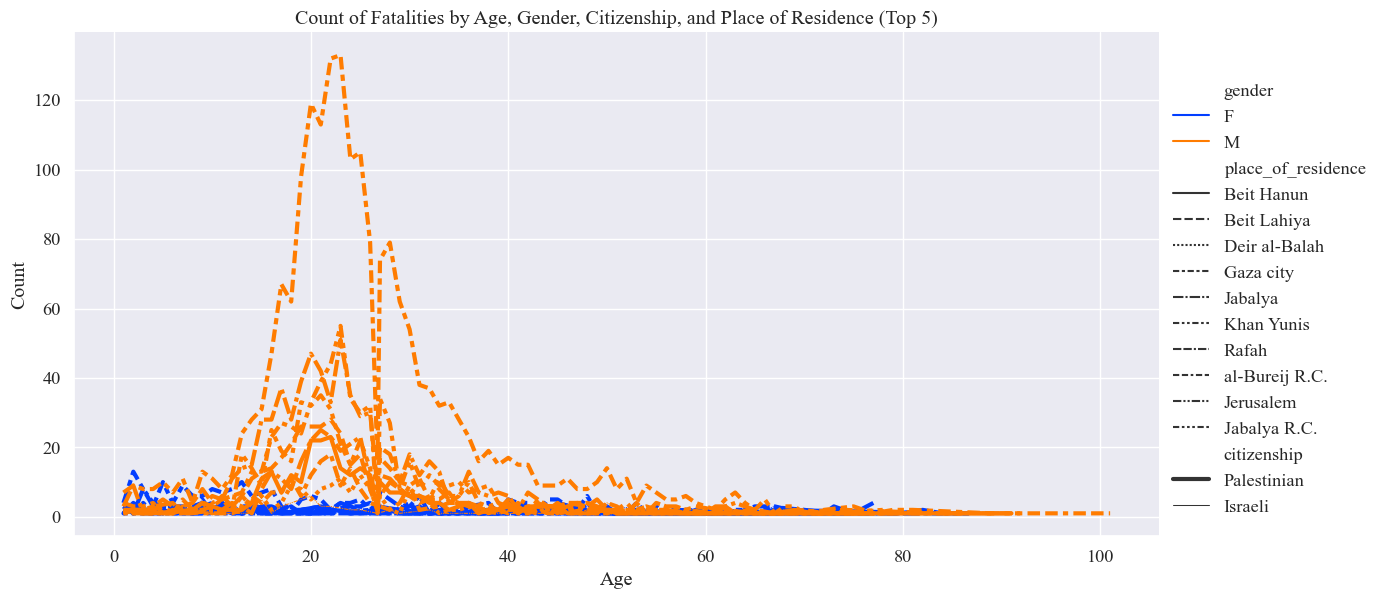

In [76]:
fatalities_count = fatalities.groupby(['age', 'gender', 'citizenship', 'place_of_residence']).size().reset_index(name='count')

top_10_cities = fatalities_count['place_of_residence'].value_counts().head(10).index
fatalities_top_10 = fatalities_count[fatalities_count['place_of_residence'].isin(top_10_cities)]

palette = sns.color_palette("bright")

sns.relplot(
    data=fatalities_top_10,
    x="age", y="count",
    hue="gender",
    size="citizenship",
    style="place_of_residence",
    kind="line",
    palette=palette,
    height=6,
    aspect=2,
)

plt.title('Count of Fatalities by Age, Gender, Citizenship, and Place of Residence (Top 5)')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()


The graph vividly illustrates that the majority of fatalities originate from Palestine's Gaza region, predominantly among individuals aged between 19 to 22. Moreover, the data strongly indicates that males constitute the most affected gender within this demographic, highlighting a concerning trend within these fatalities."